In this notebook, we will build some linear regression models to predict movie box office attributes from boxofficemojo data.  We will split our data into training and test sets, build various models on the training data and compare their results on the test set. We will examine metrics such as *mean squared error* and *mean absolute deviation*.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import ml_insights as mli

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, LassoCV

## Load the Data, Examine and Explore

In [9]:
## Load in the boxofficemojo data - top 100 domestic total gross for years 2006-2016
datafile = "movies.csv"
df=pd.read_csv(datafile)

In [10]:
## Get rid of Unnamed first column, generated when creating the csv from the scraped data
df.info()
smaller_df = df.loc[:,'Title':]
smaller_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
Unnamed: 0         1100 non-null int64
Title              1099 non-null object
Rating             1100 non-null object
Genre              1100 non-null object
Director           992 non-null object
Producer           915 non-null object
Foreign Gross      1085 non-null float64
Opening Weekend    1100 non-null int64
Widest Release     1100 non-null int64
Budget             908 non-null float64
Release Date       1100 non-null object
Domestic Gross     1100 non-null int64
Runtime            1100 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 111.8+ KB


,Title,Rating,Genre,Director,Producer,Foreign Gross,Opening Weekend,Widest Release,Budget,Release Date,Domestic Gross,Runtime
0,Pirates of the Caribbean: Dead Man's Chest,PG-13,Period Adventure,Gore Verbinski,Jerry Bruckheimer,642863913.0,135634554,4133,225000000.0,2006-07-07,423315812,151
1,Night at the Museum,PG,Family Adventure,Shawn Levy,Chris Columbus,323617573.0,30433781,3768,NaN,2006-12-22,250863268,108
2,Cars,G,Animation,John Lasseter,Darla K. Anderson,218133298.0,60119509,3988,120000000.0,2006-06-09,244082982,116
3,X-Men: The Last Stand,PG-13,Action / Adventure,Brett Ratner,Avi Arad,224997093.0,102750665,3714,210000000.0,2006-05-26,234362462,104
4,The Da Vinci Code,PG-13,Thriller,Ron Howard,Brian Grazer,540703713.0,77073388,3757,125000000.0,2006-05-19,217536138,149


In [11]:
#smaller_df= df.loc[:,['Lot Area','Overall Qual',
#      'Overall Cond', 'Year Built', 'Year Remod/Add',
#        'Gr Liv Area', 
#        'Full Bath', 'Bedroom AbvGr',
#        'Fireplaces', 'Garage Cars','SalePrice']]

In [12]:
smaller_df.describe()

,Foreign Gross,Opening Weekend,Widest Release,Budget,Domestic Gross,Runtime
count,1.085000e+03,1.100000e+03,1100.000000,9.080000e+02,1.100000e+03,1100.000000
mean,1.306353e+08,2.886188e+07,3068.269091,6.883548e+07,9.412911e+07,109.801818
std,1.745518e+08,2.846660e+07,696.638249,5.788373e+07,8.837588e+07,18.413825
min,1.698000e+04,4.134770e+05,47.000000,1.500000e+04,2.106712e+07,40.000000
25%,2.790000e+07,1.275666e+07,2713.500000,2.500000e+07,3.983632e+07,97.000000
50%,6.651400e+07,1.967803e+07,3118.000000,5.000000e+07,6.316173e+07,108.000000
75%,1.617882e+08,3.339147e+07,3527.250000,1.000000e+08,1.133734e+08,120.000000
max,2.027457e+09,2.479667e+08,4468.000000,3.000000e+08,9.366622e+08,194.000000


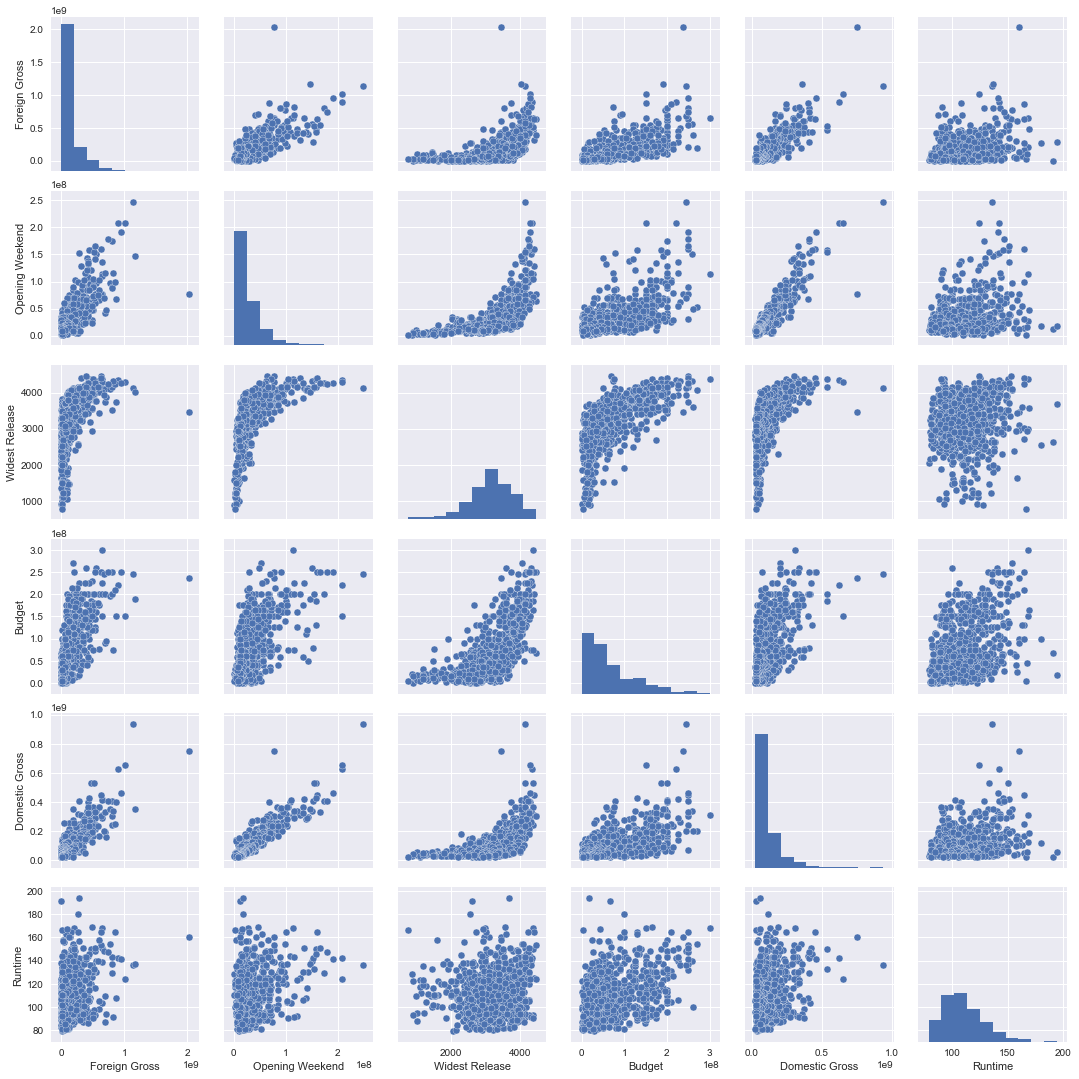

In [13]:
# Check relationships of features
# Isolate the quantitative features and get rid of nulls

#smaller_df.loc[:,['Foreign Gross', 'Opening Weekend']]
#sns.pairplot(smaller_df.loc[:,['Foreign Gross', 'Opening Weekend']].dropna())

smaller_df = smaller_df.loc[:,
            ['Foreign Gross', 'Opening Weekend', 'Widest Release', 'Budget', 'Domestic Gross', 'Runtime']].dropna()


#sns.pairplot(smaller_df.loc[:,
#           ['Foreign Gross', 'Opening Weekend', 'Widest Release', 'Budget', 'Domestic Gross', 'Runtime']].dropna())
sns.pairplot(smaller_df);
plt.savefig('pairplot')

In [14]:
#plt.scatter(smaller_df.loc[smaller_df['Lot Area']<50000,'Lot Area'], smaller_df.loc[smaller_df['Lot Area']<50000,'SalePrice'], alpha=.2)

In [15]:
#Separate our features from our target

X=smaller_df.loc[:,['Foreign Gross', 
                    'Opening Weekend', 
                    'Widest Release', 
                    'Domestic Gross', 
                    'Runtime']]

y=smaller_df['Budget']

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901 entries, 0 to 1098
Data columns (total 5 columns):
Foreign Gross      901 non-null float64
Opening Weekend    901 non-null int64
Widest Release     901 non-null int64
Domestic Gross     901 non-null int64
Runtime            901 non-null int64
dtypes: float64(1), int64(4)
memory usage: 82.2 KB


In [17]:
#Split the data 70-30 train/test
X=smaller_df.loc[:,['Foreign Gross', 
                    'Opening Weekend', 
                    'Widest Release', 
                    'Domestic Gross', 
                    'Runtime']]

y=smaller_df['Budget']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [18]:
X_train.columns

Index(['Foreign Gross', 'Opening Weekend', 'Widest Release', 'Domestic Gross',
       'Runtime'],
      dtype='object')

## One Variable Linear Regression
To begin, we will do a simple one variable linear regression, predicting the Sales Price using the Square Footage (Gr Liv Area) of the house.

In [51]:
# First let us fit only on Widest Release
selected_columns_1 = ['Widest Release']

In [52]:
lr_model1 = LinearRegression()
lr_model1.fit(X_train.loc[:,selected_columns_1],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
lr_model1.coef_, lr_model1.intercept_

(array([ 61720.39682422]), -125553924.90508211)

### Comprehension Question
What do the coefficients above represent?  How can they be interpreted?

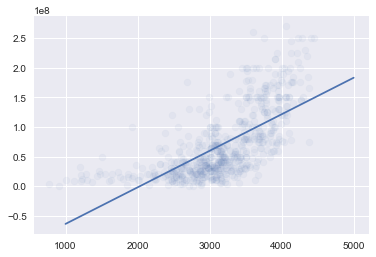

In [56]:
plt.scatter(X_train['Widest Release'],y_train,alpha=.05)
vec1 = np.linspace(1000,5000,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1)

In [57]:
### Get the predictions on the training set
train_set_pred1 = lr_model1.predict(X_train.loc[:,selected_columns_1])

In [58]:
### Get the predictions on the test set
test_set_pred1 = lr_model1.predict(X_test.loc[:,selected_columns_1])

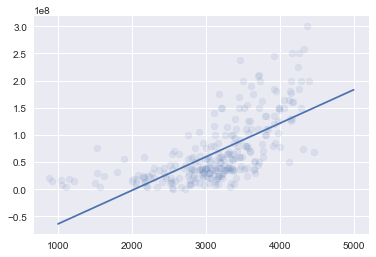

In [60]:
### Plot the regression line on top of the data

plt.scatter(X_test['Widest Release'],y_test,alpha=.1)
vec1 = np.linspace(1000,5000,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1)

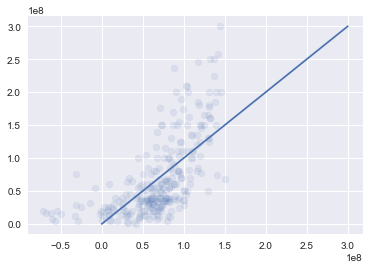

In [85]:
## Plot predicted vs actual 

plt.scatter(test_set_pred1,y_test,alpha=.1)
plt.plot(np.linspace(0,300000000,1000),np.linspace(0,300000000,1000))

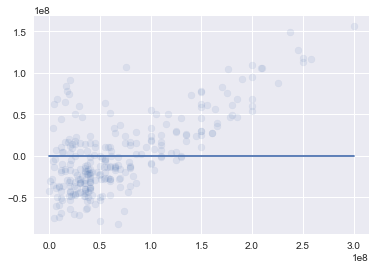

In [86]:
## Residual Plot

plt.scatter(y_test,y_test-test_set_pred1,alpha=.1)
plt.plot(np.linspace(0,300000000,1000),np.linspace(0,0,1000))

In [87]:
# How good is our model on the test set?

# Root Mean Square Error
np.sqrt(np.mean((test_set_pred1 - y_test)**2))

45028821.815954834

In [75]:
# Mean Absolute Deviation
(np.mean(np.abs(test_set_pred1 - y_test)))

35483892.17564218

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [77]:
np.sqrt(mean_squared_error(y_test, test_set_pred1)), mean_absolute_error(y_test,test_set_pred1)

(45028821.815954834, 35483892.17564217)

### Multiple Linear Regression
We will now do a regression on several variables.  We will no longer be able to see the regression line so simply in a graph, but we can still look at the predicted vs actual and residual plots

In [94]:
selected_columns_2 = ['Opening Weekend', 'Widest Release', 'Runtime']

In [95]:
lr_model2 = LinearRegression()
lr_model2.fit(X_train.loc[:,selected_columns_2],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
lr_model2.coef_

array([  4.95522821e-01,   4.67407347e+04,   7.62370874e+05])

In [97]:
lr_model2.intercept_

-178012932.13393891

In [98]:
list(zip(selected_columns_2,lr_model2.coef_))

[('Opening Weekend', 0.49552282061899672),
 ('Widest Release', 46740.734689842968),
 ('Runtime', 762370.87428699574)]

In [99]:
X.corr()

,Foreign Gross,Opening Weekend,Widest Release,Domestic Gross,Runtime
Foreign Gross,1.000000,0.773780,0.569468,0.841285,0.307983
Opening Weekend,0.773780,1.000000,0.628480,0.912838,0.266998
Widest Release,0.569468,0.628480,1.000000,0.595520,0.067996
Domestic Gross,0.841285,0.912838,0.595520,1.000000,0.287933
Runtime,0.307983,0.266998,0.067996,0.287933,1.000000


In [100]:
test_set_pred2 = lr_model2.predict(X_test.loc[:,selected_columns_2])

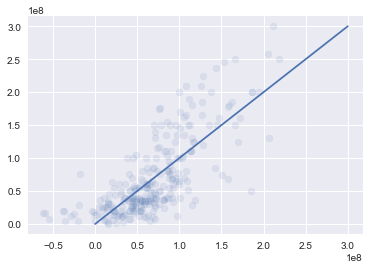

In [101]:
plt.scatter(test_set_pred2,y_test,alpha=.1)
plt.plot(np.linspace(0,300000000,1000),np.linspace(0,300000000,1000))

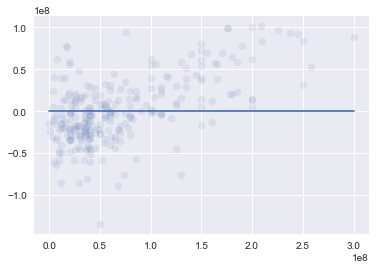

In [102]:
plt.scatter(y_test, y_test-test_set_pred2,alpha=.1)
plt.plot(np.linspace(0,300000000,1000),np.linspace(0,0,1000))

In [103]:
#RMSE
np.sqrt(np.mean((test_set_pred2 - y_test)**2))

39112012.062302947

In [104]:
#MAD
(np.mean(np.abs(test_set_pred2 - y_test)))

30148683.950125903

Next, let us try using all of the variables (in the reduced selection)

In [105]:
lr_model3 = LinearRegression()
lr_model3.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
list(zip(X_train.columns,lr_model3.coef_))

[('Foreign Gross', 0.16408873978488023),
 ('Opening Weekend', 0.16930212049584806),
 ('Widest Release', 39689.406924884301),
 ('Domestic Gross', -0.11838170685025776),
 ('Runtime', 622682.07378111745)]

In [107]:
test_set_pred3 = lr_model3.predict(X_test)

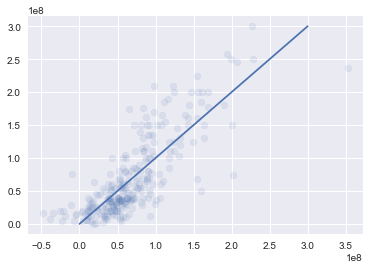

In [108]:
plt.scatter(test_set_pred3,y_test,alpha=.1)
plt.plot(np.linspace(0,300000000,1000),np.linspace(0,300000000,1000))

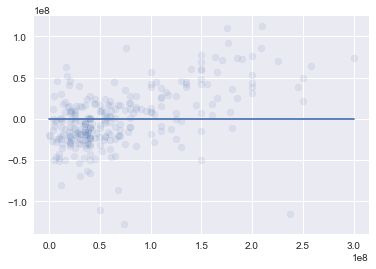

In [109]:
plt.scatter(y_test,y_test-test_set_pred3,alpha=.1)
plt.plot(np.linspace(0,300000000,1000),np.linspace(0,0,1000))

In [110]:
#RMSE
np.sqrt(np.mean((test_set_pred3 - y_test)**2))

35553166.519814402

In [111]:
#MAD
(np.mean(np.abs(test_set_pred3 - y_test)))

27075568.33216159

### Adding a quadratic factor
Again, we see that our residual plot indicates some non-linearity.

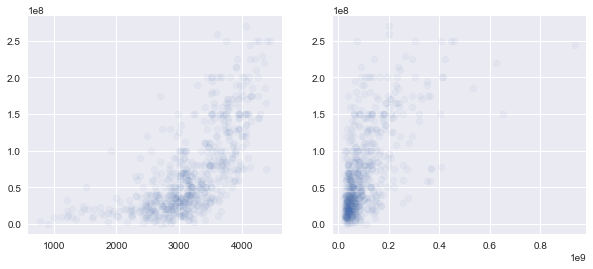

In [113]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].scatter(X_train['Widest Release'],y_train, alpha = .05)

ax[1].scatter(X_train['Domestic Gross'],y_train, alpha = .05)

Let's try adding in `'Widest Release'` *squared* as a predictor variable

In [553]:
X['WR2'] = X['Widest Release']**2
X.columns


Index(['Foreign Gross', 'Opening Weekend', 'Widest Release', 'Domestic Gross',
       'Runtime', 'WR2'],
      dtype='object')

In [554]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [165]:
lr_model4 = LinearRegression()
lr_model4.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [166]:
list(zip(X_train.columns,lr_model4.coef_))

[('Foreign Gross', 0.13998233308023178),
 ('Opening Weekend', 0.077068807400214545),
 ('Widest Release', -61276.226134695957),
 ('Domestic Gross', -0.13843703448205402),
 ('Runtime', 640331.35603651789),
 ('WR2', 18.562722949350363)]

In [167]:
test_set_pred4 = lr_model4.predict(X_test)

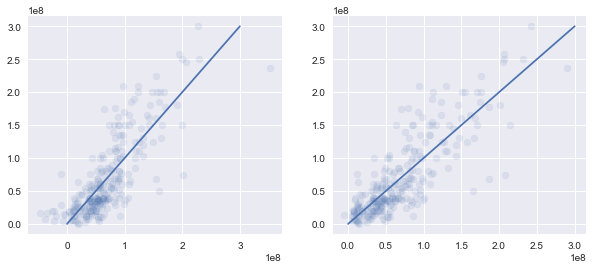

In [168]:
# Compare the old test of all features (pred2=3) to this new one (pred4) with all features plus the squared WR term
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].scatter(test_set_pred3,y_test,alpha=.1)
ax[1].scatter(test_set_pred4,y_test,alpha=.1)

ax[0].plot(np.linspace(0,300000000,1000),np.linspace(0,300000000,1000))
ax[1].plot(np.linspace(0,300000000,1000),np.linspace(0,300000000,1000))

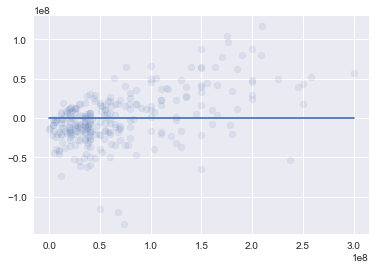

In [169]:
plt.scatter(y_test,y_test-test_set_pred4,alpha=.1)
plt.plot(np.linspace(0,300000000,1000),np.linspace(0,0,1000))

In [170]:
#RMSE
np.sqrt(np.mean((test_set_pred4 - y_test)**2))

33804802.919379786

In [171]:
#MAD
(np.mean(np.abs(test_set_pred4 - y_test)))

25050388.7827208

### Day 2

You may have heard of the term *R-squared*.  R-squared measures the "percentage of variance explained by the predictors".  Another way to express this is to calculate the "sum of squares" in two different ways:
1. Using the squared differences between our prediction and the actual value
2. Using the squared differences between the mean of y and the actual value

(So in the second variant above, you can think of it as a really naive prediction where you just guess the mean of y for every entry, regardless of the value of the predictors)

The first number is called the SSE (sum of squares error).  The second number is called the SST (sum of squares total).  So then SSE/SST is what percentage of the total variance *remains* after the predictors are factored in.  Therefore $1-\frac{SSE}{SST}$ is the *explained variance*.  $R^2 = 1-\frac{SSE}{SST}$.

In [172]:
## R-squared
SSE = np.sum(np.mean((test_set_pred4 - y_test)**2))
SST = np.sum(np.mean((np.mean(y_test) - y_test)**2))
r_squared = 1-SSE/SST
r_squared

0.67281412781017091

In [173]:
## can also use the sklearn function

from sklearn.metrics import r2_score
r2_score(y_test, test_set_pred4)

0.67281412781017125

In [174]:
## Each model in sklearn has a designated "score".
## For LinearRegression, r^2 is the designated "score"
## This function does the predictions on X_test, and then computes the R^2 in one step
lr_model4.score(X_test,y_test)

0.67281412781017125

### Regularization
We have been playing around with adding in variables (or transformations of variables), and then seeing if they improve the model or not.  However, this can be a tedious process.

Regularized Linear Regression (sometimes called Penalized Linear Regression) tries to circumvent this by changing the *cost function*.  In "vanilla" linear regression, the coefficients are chosen purely to minimize the Sum of Squared Errors.  In Regularized Linear Regression, there is an additional component of the cost function that penalizes the "size" of the coefficients.  

Why penalize a coefficient?  At the simplest level, it forces a variable to be "worth it" in order to have a coefficient greater than zero.  This intuition extends to the size of the coefficient - in some ways it is a "simpler model" to have smaller coefficients (in absolute value) than larger ones.

Regularized Linear Regression introduces a "nuisance parameter" that says how strongly we want to penalize the coefficients.  At one extreme there is no penalty, and we revert back to "vanilla" Linear Regression.  At the other extreme, the penalty is so onerous that we set all of the coefficients to zero.  In between these two extremes are continuous set of models.  We will discuss how to choose the best value later on when we discuss *cross-validation*.

There are two main "flavors" of Regularized Linear Regression.  In the LASSO, we penalize the sum of the absolute values of the coefficients and in Ridge Regression we penalize the sum of the squares of the coefficients.  LASSO is often preferred for some detailed reasons we will discuss later.

Let's see some examples.

In [175]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [184]:

X_train.columns

Index(['Foreign Gross', 'Opening Weekend', 'Widest Release', 'Domestic Gross',
       'Runtime', 'WR2'],
      dtype='object')

In [187]:
#selected_columns_3 = ['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built','Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr',
#       'Fireplaces', 'Garage Cars', 'OQ2']
#selected_columns_3 = ['Overall Qual','OQ2','Fireplaces','Full Bath','Fireplaces']

selected_columns_3 = X_train.columns

In [223]:

lr_model5 = Lasso(alpha = 100000000)
lr_model5.fit(X_train.loc[:,selected_columns_3],y_train)

Lasso(alpha=100000000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [224]:
list(zip(selected_columns_3,lr_model5.coef_))

[('Foreign Gross', 0.15256100452235005),
 ('Opening Weekend', 0.093716751768486484),
 ('Widest Release', -50216.31801605496),
 ('Domestic Gross', -0.12682074629527768),
 ('Runtime', 313589.78812444618),
 ('WR2', 16.159529386844873)]

In [225]:
test_set_pred5 = lr_model5.predict(X_test.loc[:,selected_columns_3])

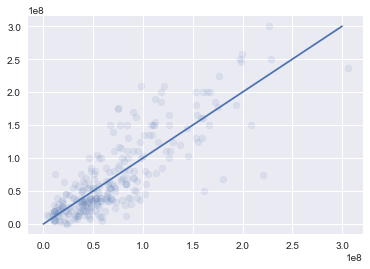

In [226]:
plt.scatter(test_set_pred5,y_test,alpha=.1)
plt.plot(np.linspace(0,300000000,1000),np.linspace(0,300000000,1000))

In [227]:
#RMSE
np.sqrt(np.mean((test_set_pred5 - y_test)**2))

34018628.831276007

In [462]:
lr_model5.score(X_test, y_test)

0.66866193206254598

### Cross-Validation
Cross validation is a more sophisticated, yet more time intensive alternative to a single train-test split.  The idea is to divide your data set into "folds" (e.g. 5 equally sized subsets of your data).  We then iteratively select each fold to be the test set and the rest to be the training set.  We then judge the performance on the 5 different test folds.

This is frequently done to select "nuisance parameters".  You can try a bunch of different values, see which one gives the best results on cross validation, and then train your model on the entire data set using the best parameter value.

In [564]:
alphavec = 10**np.linspace(-3,9,100)
alphavec

array([  1.00000000e-03,   1.32194115e-03,   1.74752840e-03,
         2.31012970e-03,   3.05385551e-03,   4.03701726e-03,
         5.33669923e-03,   7.05480231e-03,   9.32603347e-03,
         1.23284674e-02,   1.62975083e-02,   2.15443469e-02,
         2.84803587e-02,   3.76493581e-02,   4.97702356e-02,
         6.57933225e-02,   8.69749003e-02,   1.14975700e-01,
         1.51991108e-01,   2.00923300e-01,   2.65608778e-01,
         3.51119173e-01,   4.64158883e-01,   6.13590727e-01,
         8.11130831e-01,   1.07226722e+00,   1.41747416e+00,
         1.87381742e+00,   2.47707636e+00,   3.27454916e+00,
         4.32876128e+00,   5.72236766e+00,   7.56463328e+00,
         1.00000000e+01,   1.32194115e+01,   1.74752840e+01,
         2.31012970e+01,   3.05385551e+01,   4.03701726e+01,
         5.33669923e+01,   7.05480231e+01,   9.32603347e+01,
         1.23284674e+02,   1.62975083e+02,   2.15443469e+02,
         2.84803587e+02,   3.76493581e+02,   4.97702356e+02,
         6.57933225e+02,

In [565]:
lr_model6 = LassoCV(alphas = alphavec, cv=5)
lr_model6.fit(X_train.loc[:,selected_columns_3],y_train)

/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=array([  1.00000e-03,   1.32194e-03, ...,   7.56463e+08,   1.00000e+09]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [566]:
lr_model6.alpha_

403701.72585965495

In [567]:
list(zip(X_train.columns,lr_model6.coef_))

[('Foreign Gross', 0.1400331133949328),
 ('Opening Weekend', 0.0771360154355408),
 ('Widest Release', -61231.577085888894),
 ('Domestic Gross', -0.13839013932017993),
 ('Runtime', 639012.29468775738),
 ('WR2', 18.553021213892862)]

In [568]:
test_set_pred6 = lr_model6.predict(X_test.loc[:,selected_columns_3])

In [569]:
#RMSE
np.sqrt(np.mean((test_set_pred6 - y_test)**2))

33803880.539106861

In [570]:
np.sqrt(mean_squared_error(test_set_pred6, y_test)), mean_absolute_error(test_set_pred6, y_test)

(33803880.539106853, 25049963.606303088)

In [571]:
lr_model6.score(X_test, y_test)

0.67283198241370612

### Scaling Parameters
One issue with Regularized Linear Regression is that the "size" of a coefficient may be more reflective of the units or scale of the associated variable.  For example, if a distance is measured in millimeters it will have a smaller coefficient than if it is measured in miles.  For this reason, best practice is to "standardize" the variables prior to running a regularized regression.  Standardizing means adding a constant and then dividing by another constant so that the resulting variable has mean 0 and standard deviation 1.  This ensures that the variables are penalized "fairly" with respect to one another.

We demonstrate how to do this below.

In [238]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [239]:
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
#std.fit(X_train.values.astype(float))
std.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [240]:
## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_tr = std.transform(X_train)

In [241]:
## Apply the scaler to the test set

X_te = std.transform(X_test)

In [242]:
## Note that even though we put a Pandas Dataframe into the scalar, what comes out is a numpy array
## In general, sklearn works on numpy.  It will accept pandas objects by trying to coerce them to numpy arrays
## But it will not output any pandas objects

type(X_train),type(X_tr)

(pandas.core.frame.DataFrame, numpy.ndarray)

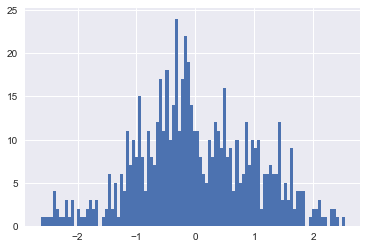

In [286]:
## Here we can plot histograms of the transformed variables
## Note that they seem to have means of 0 and stddevs of 1
## (though they do not necessarily seem to be normally distributed)

plt.hist(X_tr[:,5],bins=100);

Now that we have appropriately scaled our variables, we can apply the LASSO as before.

What we did before was technically not good practice since the variables were on different scales.  Certain variables would be (unfairly) penalized more than others.

In [614]:
## Fit a LASSO model on the standardized data

lr_model7 = Lasso(alpha = .1)
lr_model7.fit(X_tr,np.log(y_train))

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [615]:
## Note, it is now difficult to interpret the coefficients
## Would have to do the math to translate back to the original scaling

list(zip(X_train.columns,lr_model7.coef_))

[('Foreign Gross', 0.11432636033876303),
 ('Opening Weekend', 0.0),
 ('Widest Release', 0.11048577478614452),
 ('Domestic Gross', 0.0),
 ('Runtime', 0.130034533408034),
 ('WR2', 0.39806213034667659)]

In [607]:
selected_columns_3

Index(['Foreign Gross', 'Opening Weekend', 'Widest Release', 'Domestic Gross',
       'Runtime', 'WR2'],
      dtype='object')

In [616]:
lr_model7.score(X_te, np.log(y_test))

0.49952316269428398

In [622]:
np.sqrt(np.mean(np.exp(lr_model7.predict(X_te)-np.log(y_test))**2))

14.445571623030567

## Finding the "best" value of lambda (alpha) with a single train/test split
Here we will first decide on a vector of "candidate" alpha (lambda) values.  Then, for each candidate value, we run the following steps:
1. Standardize the training data
2. Fit a LASSO model on the training data
3. Using the newly trained model, make predictions on both the training data and the test data
4. Find the sum of squares error on both the training set and test set

Then we plot how the errors change for the different values of alpha.

We can then choose the alpha which gives us the best results on the test set.

In [647]:
alphalist = 10**(np.linspace(0,7,200))
#alphalist = alphavec
err_vec_test = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    steps = [('standardize', StandardScaler()), ('lasso', Lasso(alpha = curr_alpha))]
#    steps = [('standardize', StandardScaler()), ('ridge', Ridge(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,selected_columns_3], y_train)
    test_set_pred7 = pipe.predict(X_test.loc[:,selected_columns_3])
    err_vec_test[i] = np.sqrt(np.mean((test_set_pred7 - y_test)**2))

    train_set_pred7 = pipe.predict(X_train.loc[:,selected_columns_3])
    err_vec_train[i] = np.sqrt(np.mean((train_set_pred7 - y_train)**2))

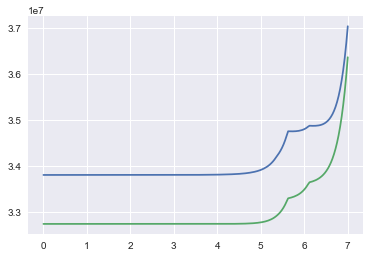

In [648]:
#plot the curves of both the training error and test error as alpha changes

plt.plot(np.log10(alphalist),err_vec_test)
plt.plot(np.log10(alphalist),err_vec_train)
plt.savefig('fig')

In [649]:
## This is the minimum error achieved on the test set across the different alpha values we tried

np.min(err_vec_test)

33804803.50726451

In [650]:
## This is the value of alpha that gave us the lowest error
alphalist[np.argmin(err_vec_test)]

1.0

In [550]:
X.columns

Index(['Foreign Gross', 'Opening Weekend', 'Widest Release', 'Domestic Gross',
       'Runtime', 'WR2'],
      dtype='object')

In [626]:
df['Genre'].unique()
#df['Rating'].unique()

mincount = 20
gdf = df.groupby('Genre').count().sort_values('Title',ascending=False)['Title']
#list(zip(gdf[gdf>mincount].index, gdf[gdf>mincount]))
grows = df['Genre'].isin(gdf[gdf > mincount].index)
df_gdummies = pd.get_dummies(df[grows]['Genre'])
df_rdummies = pd.get_dummies(df[grows]['Rating'])
gdf[gdf>mincount]


Genre
Comedy                170
Animation             105
Drama                  89
Horror                 76
Thriller               57
Action / Adventure     56
Action                 50
Romantic Comedy        39
Fantasy                30
Comedy / Drama         30
Action Comedy          25
Sci-Fi Action          24
Family Comedy          22
Name: Title, dtype: int64

In [627]:
df2 = pd.concat([df[grows]['Title'], smaller_df[grows], df_gdummies, df_rdummies], axis=1)
df2 = df2.dropna()
len(df2)


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


636

In [629]:
df2.columns
Xd = df2.loc[:,['Foreign Gross', 'Opening Weekend', 'Widest Release',
       'Domestic Gross', 'Runtime', 'Action / Adventure', 'Animation',
       'Comedy', 'Drama', 'Horror', 'Thriller', 'G', 'PG', 'PG-13', 'R']]
Xd['WR2'] = X['Widest Release']**2
yd = df2['Budget']
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size=0.3,random_state=42)

In [630]:
len(Xd_train)

445

### Using LassoCV to find the best alpha via Cross-Validation
In the previous, we found the best alpha value by comparing the performance on a single train/test split.  An even better, though more computationally intensive method, is to do a full cross-validation when comparing the different alphas.  Fortunately, the `LassoCV` in sklearn handles this "under the hood".  You pass the `LassoCV` the list of alphas and the number of folds to use for Cross-Validation.  It will do the following:

- For each value of alpha
1. Do a cross-validation and score the result
- Find the value of alpha that gave the best score
- Fit the model on all the data using the value of alpha it just found

Then you can use the `predict` method of the model just as with all of our previous models

In [631]:
## Scale the data as before
std = StandardScaler()
std.fit(Xd_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [632]:
## Scale the Predictors on both the train and test set
Xd_tr = std.transform(Xd_train)
Xd_te = std.transform(Xd_test)

In [633]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha
lr_model8 = LassoCV(alphas = alphavec, cv=5)
lr_model8.fit(Xd_tr,yd_train)

LassoCV(alphas=array([  1.00000e-03,   1.32194e-03, ...,   7.56463e+08,   1.00000e+09]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [634]:
# This is the best alpha value it found
lr_model8.alpha_

75646.332755462907

In [635]:
# These are the coefficients when it refit using that best alpha
list(zip(Xd_train.columns,lr_model8.coef_))

[('Foreign Gross', 21207732.803767901),
 ('Opening Weekend', 5140311.6542857606),
 ('Widest Release', -13625260.990080003),
 ('Domestic Gross', -13684945.279996024),
 ('Runtime', 13746568.110478181),
 ('Action / Adventure', 6197170.0705810776),
 ('Animation', 1908266.427359137),
 ('Comedy', -4582807.5956931226),
 ('Drama', -7363971.9178647799),
 ('Horror', -5474228.8308118153),
 ('Thriller', -3614717.1722402),
 ('G', 1377088.8046914563),
 ('PG', 3283934.8197899722),
 ('PG-13', -0.0),
 ('R', -6341423.1185823139),
 ('WR2', 36545458.131579392)]

In [636]:
# Make predictions on the test set using the new model
test_set_pred8 = lr_model8.predict(Xd_te)

In [637]:
# Find the RMSE on the test set using that model
np.sqrt(np.mean((test_set_pred8 - yd_test)**2))

27084828.022507135

In [638]:
lr_model8.score(Xd_te, yd_test)

0.73858914093386874

## LARS_Path
This is a tool used to visualize *all* of the models across the range of different alpha values.  At the far left is the value of alpha where the penalty on coefficients is *so* onerous, that it just sets all of the coefficients to zero.  At the far left is when there is no penalty, and corresponds to the values of the coefficients that you would get from a "vanilla" linear regression.

So each vertical slice corresponds to the coefficients you would get at a particular setting of alpha.  The black dotted lines indicate where a new variable "enters" the model (that is, its coefficient changes from 0 to non-zero).

This is a good way to see which variables are most influential and how their strengths change as you change the value of alpha.

In [ ]:
from sklearn.linear_model import lars_path

In [ ]:
## Scale the variables
std = StandardScaler()
#std.fit(X_train.values.astype(float))
std.fit(X_train)

In [ ]:
X_tr = std.transform(X_train)


In [ ]:
## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso', verbose=True)

In [ ]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()